# sklearn 

in this module we'll be using the scikit-learn package for machine learning

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
jura = pd.read_csv('data/jura.csv')
jura

,Xloc,Yloc,Landuse,Rock,Cd,Co,Cr,Cu,Ni,Pb,Zn
0,238.6,307.7,3,3,1.740,9.32,38.32,25.72,21.32,77.36,92.56
1,254.4,197.2,2,2,1.335,10.00,40.20,24.76,29.72,77.88,73.56
2,280.7,334.7,2,3,1.610,10.60,47.00,8.88,21.40,30.80,64.80
3,430.8,193.3,3,2,2.150,11.92,43.52,22.70,29.72,56.40,90.00
4,438.3,108.1,3,5,1.565,16.32,38.52,34.32,26.20,66.40,88.40
...,...,...,...,...,...,...,...,...,...,...,...
254,428.3,327.8,3,2,0.844,13.88,37.12,21.04,26.48,34.68,90.00
255,353.0,499.9,1,1,0.490,7.44,34.52,4.64,16.76,31.64,56.80
256,407.0,415.7,3,3,1.916,14.36,47.60,45.60,28.44,50.00,90.80
257,461.0,331.5,1,2,1.384,12.68,30.76,7.48,20.72,48.00,46.80


In [51]:
from sklearn import preprocessing

In [52]:
x = jura[['Cd','Co','Cr','Ni','Pb','Zn']]

In [53]:
scaler = preprocessing.StandardScaler()

In [54]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
x_trans = scaler.transform(x)

In [71]:
rt = jura.Rock

In [72]:
ohe = preprocessing.OneHotEncoder()

In [73]:
ohe.fit(rt.values.reshape(-1,1))

C:\Users\jlalv\Anaconda3\envs\curso_python\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [74]:
id = ohe.transform(rt.values.reshape(-1,1))

In [75]:
id = id.toarray()

In [76]:
id

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [77]:
from sklearn import decomposition

In [78]:
pca = decomposition.PCA()

In [79]:
pca.fit_transform(x)

array([[ 2.90285077e+01,  4.86601782e+00, -1.06543221e+00,
         9.46155922e-01,  3.05870382e-01,  1.45352975e-01],
       [ 1.76409875e+01,  1.48371239e+01,  1.18914163e+01,
        -4.86084745e+00,  2.60140164e+00, -2.89790718e-03],
       [-2.07994162e+01, -1.39129809e+01,  1.17401475e+01,
         4.58446117e+00, -1.35588340e+00,  1.76034413e-01],
       ...,
       [ 1.15387746e+01, -1.77855561e+01,  8.11939778e+00,
        -1.28346574e+00, -2.05945600e+00,  1.75790998e-01],
       [-2.40954564e+01,  1.38922129e+01,  7.87446666e+00,
        -4.77144440e+00, -2.53539874e+00,  9.22410483e-01],
       [-2.60978946e+01, -1.10992132e+00, -7.42647008e-01,
        -1.68114595e+00, -1.57259034e-01, -1.10010957e-01]])

In [80]:
from sklearn import cluster

In [81]:
kmeans = cluster.KMeans()

In [90]:
kmeans.fit(x)
labels = kmeans.labels_
labels

array([0, 0, 7, 5, 0, 0, 0, 3, 1, 5, 4, 7, 6, 1, 7, 1, 6, 6, 1, 3, 4, 5,
       5, 4, 5, 0, 7, 0, 6, 3, 4, 5, 1, 4, 1, 7, 5, 0, 5, 2, 1, 4, 5, 0,
       4, 7, 3, 1, 7, 7, 0, 0, 7, 0, 5, 1, 5, 5, 6, 5, 5, 6, 7, 4, 0, 1,
       0, 4, 6, 4, 5, 5, 4, 7, 5, 7, 5, 0, 7, 3, 0, 6, 1, 1, 6, 4, 5, 5,
       7, 5, 6, 7, 5, 1, 7, 6, 5, 5, 4, 6, 5, 3, 5, 5, 4, 3, 7, 2, 7, 7,
       7, 5, 7, 1, 7, 5, 7, 7, 6, 5, 5, 5, 1, 1, 3, 7, 4, 1, 1, 6, 5, 7,
       6, 0, 1, 0, 7, 6, 6, 0, 6, 0, 5, 4, 5, 0, 7, 6, 2, 7, 5, 7, 0, 0,
       5, 0, 7, 1, 1, 5, 4, 5, 5, 4, 6, 1, 7, 7, 3, 1, 4, 7, 7, 4, 7, 0,
       7, 1, 5, 5, 5, 0, 0, 2, 0, 0, 5, 1, 1, 3, 7, 7, 4, 6, 1, 5, 5, 4,
       6, 0, 3, 0, 2, 0, 5, 5, 0, 6, 6, 1, 5, 7, 5, 5, 1, 3, 0, 7, 0, 6,
       6, 6, 1, 5, 5, 6, 6, 6, 5, 0, 6, 7, 1, 7, 0, 6, 7, 1, 7, 7, 7, 7,
       5, 6, 6, 6, 7, 0, 5, 0, 7, 7, 0, 4, 5, 7, 5, 1, 7])

<function matplotlib.pyplot.show(*args, **kw)>

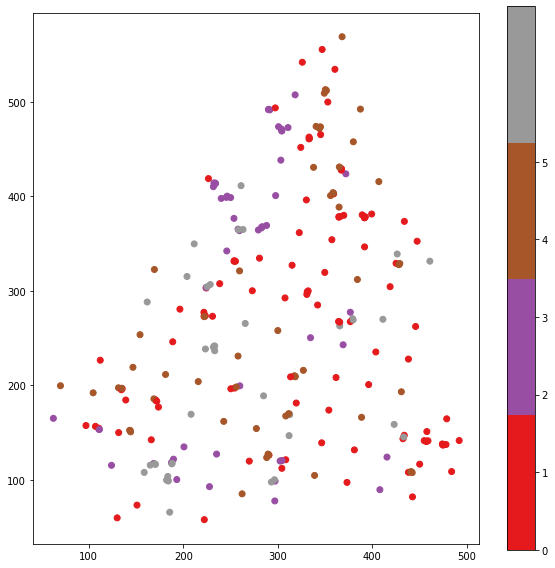

In [88]:
plt.figure(figsize=(10,10))
plt.scatter(jura['Xloc'], jura['Yloc'], c=labels, cmap = plt.cm.get_cmap('Set1',4))
plt.axis('scaled')
plt.colorbar(ticks=range(6))
plt.show

In [93]:
#Removendo 10% das amostras de Rock aleatoriamente.
indexes = np.random.randint(0,len(jura['Rock']),int(len(jura['Rock']*0.1)))
removed_cat = jura['Rock'].values.copy()
removed_cat[indexes] = -99
removed_cat = np.where(removed_cat == -99, np.nan, removed_cat)
jura['removed_cat'] = removed_cat

In [98]:
jura.removed_cat

0      NaN
1      2.0
2      3.0
3      NaN
4      5.0
      ... 
254    NaN
255    1.0
256    NaN
257    NaN
258    NaN
Name: removed_cat, Length: 259, dtype: float64

In [95]:
x_train = jura.dropna()[['Cd','Co','Cu','Ni','Pb','Zn']]

In [96]:
y_train = jura.dropna()[['removed_cat']]

In [97]:
filtro = np.isnan(jura['removed_cat'])
x_prediction = jura[['Cd','Co','Cu','Ni','Pb','Zn']][filtro].values

In [99]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier()

rf.fit(x_train, y_train)

rf.predict(x_prediction)

C:\Users\jlalv\Anaconda3\envs\curso_python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jlalv\Anaconda3\envs\curso_python\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


array([2., 2., 1., 1., 3., 3., 1., 1., 1., 1., 2., 2., 1., 5., 3., 2., 2.,
       3., 3., 1., 2., 5., 3., 3., 3., 3., 1., 1., 5., 1., 3., 5., 3., 1.,
       5., 1., 3., 1., 3., 2., 3., 3., 1., 3., 3., 2., 2., 2., 5., 1., 2.,
       5., 3., 1., 1., 5., 2., 2., 2., 1., 5., 3., 1., 3., 3., 1., 1., 3.,
       2., 1., 2., 1., 2., 1., 2., 1., 1., 5., 1., 1., 1., 1., 5., 5., 2.,
       2., 2., 5., 2., 2., 2., 2., 5., 1., 3., 1., 5., 1., 3., 1., 3., 3.,
       1., 5., 1., 5., 2., 3., 5., 1., 5., 1., 3., 3., 5., 5., 1., 5., 5.,
       2., 3., 1., 1., 5., 2., 5., 3., 3., 1., 2., 3., 1., 5., 5., 1., 2.,
       5., 5., 5., 3., 1., 3., 3., 5., 2., 3., 3., 2., 2., 3., 3., 1., 1.,
       3., 3., 2., 2., 2., 5., 1., 3.])

In [102]:
indexes = np.random.randint(0, len(jura['Cd']), int(len(jura['Cd'])*0.1))
removed_cd = jura['Cd'].values.copy()
removed_cd[indexes] = -99
removed_cd = np.where(removed_cd == -99, np.nan, removed_cd)
jura['removed_cd'] = removed_cd

In [103]:
jura.drop(columns=['removed_cat'], inplace=True)
X_train = X_train = jura.dropna()[['Co','Cu','Ni','Pb','Zn']]

In [105]:
Y_train = Y_train = jura.dropna()[['removed_cd']] 

In [107]:
filtro = np.isnan(jura['removed_cd'])
X_prediction = jura[['Co','Cu','Ni','Pb','Zn']][filtro].values

In [108]:
rf_reg = ensemble.RandomForestRegressor()
rf_reg.fit(X_train, Y_train)
rf_reg.predict(X_prediction)

C:\Users\jlalv\Anaconda3\envs\curso_python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jlalv\Anaconda3\envs\curso_python\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([1.8483, 1.427 , 1.515 , 0.696 , 1.0495, 0.7015, 1.3868, 1.1353,
       1.505 , 0.9188, 1.0504, 1.8115, 1.5009, 0.9927, 1.3965, 0.5735,
       1.1649, 0.9354, 0.9645, 0.842 , 1.0645, 0.6574, 1.101 , 0.7858,
       2.0578])